In [1]:
import schemdraw
from schemdraw import elements as elm
from schemdraw import logic
from schemdraw.util import Point
#schemdraw.use('svg')
#schemdraw.settextmode('text')

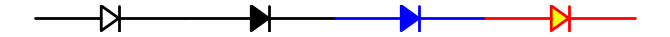

In [2]:
# Fill parameter. fill(True) picks up element color
with schemdraw.Drawing():
    elm.Diode()   # No fill
    elm.Diode().fill(True)  # Black fill
    elm.Diode().color('blue').fill(True)   # Blue fill
    elm.Diode().color('red').fill('yellow')   # Yellow fill

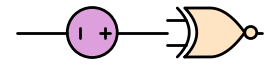

In [3]:
# Fill on paths (like the gate) and shapes (like the source)
with schemdraw.Drawing():
    elm.SourceV().right().fill('plum')
    logic.Xnor().fill('bisque')

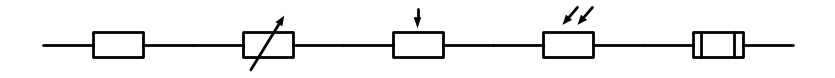

In [4]:
# IEEE vs IEC style
elm.style(elm.STYLE_IEC)
with schemdraw.Drawing():
    elm.Resistor()
    elm.ResistorVar()
    elm.Potentiometer()
    elm.Photoresistor()
    elm.Fuse()

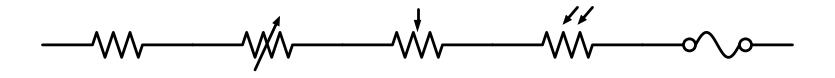

In [5]:
elm.style(elm.STYLE_IEEE)
with schemdraw.Drawing():
    elm.Resistor()
    elm.ResistorVar()
    elm.Potentiometer()
    elm.Photoresistor()
    elm.Fuse()

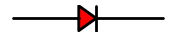

In [6]:
# Use of Element.defaults
elm.Diode.defaults['fill'] = 'red'
elm.Diode()

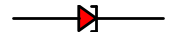

In [7]:
# All Subclasses of Diode pick up the default too
elm.DiodeTunnel()

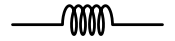

In [8]:
elm.Inductor2()

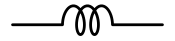

In [9]:
elm.Inductor2.defaults['loops'] = 2
elm.Inductor2()

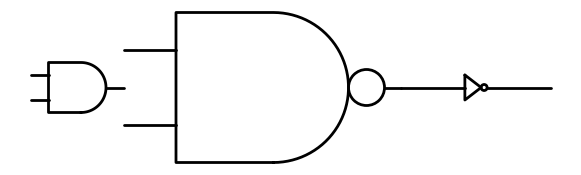

In [10]:
# Scale/zoom
with schemdraw.Drawing():
    logic.And()
    logic.Nand().scale(3)
    logic.Not().scale(.5)

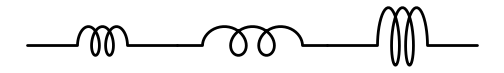

In [11]:
with schemdraw.Drawing():
    elm.Inductor2()
    elm.Inductor2().scalex(2)
    elm.Inductor2().scaley(2)

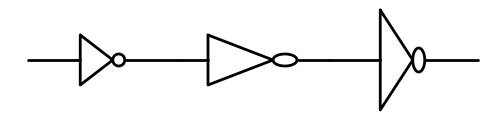

In [12]:
with schemdraw.Drawing():
    logic.Not()
    logic.Not().scalex(2)
    logic.Not().scaley(2)

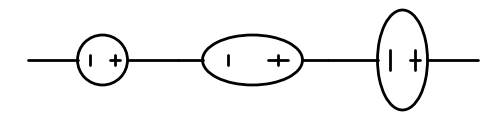

In [13]:
with schemdraw.Drawing():
    elm.SourceV().right()
    elm.SourceV().scalex(2).right()
    elm.SourceV().scaley(2).right()

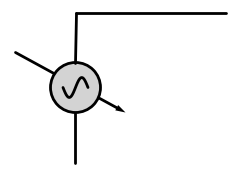

In [14]:
# Zorder. Arrow goes behind.
class TestZorder(elm.SourceSin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.segments.append(schemdraw.Segment([[1.2, 1.2], [0, -1]], arrow='>',
                                          arrowwidth=.12, arrowlength=.2, zorder=0))

with schemdraw.Drawing():
    TestZorder().fill('lightgray')
    elm.Line().right()

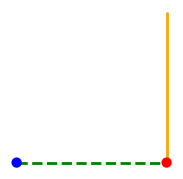

In [15]:
# Nested ElementDrawing. Three different colors
with schemdraw.Drawing(show=False) as d1:
    elm.Dot().color('red') # This color overrides orange color set on ElementDrawing
    elm.Line().up()  # This line picks up color from ElementDrawing (orange)

with schemdraw.Drawing() as d2:
    elm.Dot().color('blue')
    elm.Line().color('green').linestyle('--')
    elm.ElementDrawing(d1).color('orange')

In [16]:
# Themes
def drawtheme(theme):
    schemdraw.theme(theme)
    d = schemdraw.Drawing()
    d += elm.Fuse()  # Use Fuse since it shows open dots that should fill with bg color
    return d
    
drawtheme('default')

In [17]:
drawtheme('dark')

In [18]:
drawtheme('solarizedd')

In [19]:
drawtheme('solarizedl')

In [20]:
drawtheme('monokai')

In [21]:
drawtheme('onedork')

In [22]:
drawtheme('oceans16')

In [23]:
drawtheme('gruvboxl')

In [24]:
drawtheme('gruvboxd')

In [25]:
drawtheme('chesterish')

In [26]:
drawtheme('grade3')

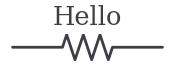

In [27]:
# Setting drawing defaults, can be overridden by elements
d = schemdraw.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label('Hello')
d.draw()

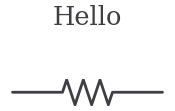

In [28]:
d = schemdraw.Drawing(font='serif', fontsize=20, lblofst=1)
d += elm.Resistor().label('Hello')
d.draw()

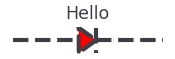

In [29]:
d = schemdraw.Drawing(ls='--', lw=3, fill='red')
d += elm.Diode().label('Hello')
d.draw()

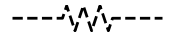

In [30]:
elm.Resistor().linestyle('--')

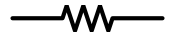

In [31]:
elm.Resistor().linewidth(3)

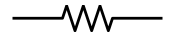

In [32]:
elm.Resistor(capstyle='butt')

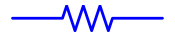

In [33]:
elm.Resistor().color('blue')

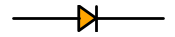

In [34]:
elm.Diode().fill('orange')

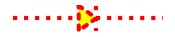

In [35]:
elm.Diode().style(color='red', fill='yellow', ls=':', lw=3)

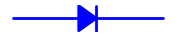

In [36]:
elm.Diode().color('blue').fill(True)  # fill=True picks up element color (poly segment)

In [37]:
d = schemdraw.Drawing(fill='red')
d += elm.Diode().color('blue').fill(False)  # fill=False leaves open even with drawing fill set
d

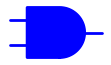

In [38]:
logic.And().color('blue').fill(True)  # fill=True picks up element color (poly segment)

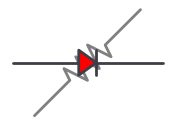

In [39]:
# Resistor should go behind
with schemdraw.Drawing():
    D = elm.Diode().zorder(3)
    elm.Resistor(d=45).at(D.center).anchor('center').color('gray')

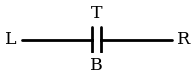

In [40]:
(elm.Capacitor()
     .label('L', font='serif', loc='lft')
     .label('R', font='serif', loc='rgt')
     .label('T', font='serif', loc='top')
     .label('B', font='serif', loc='bot'))

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:795: UserWarning: Duplicated direction parameter in element. `up` changed to `down`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `down`.")


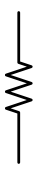

In [41]:
# REMAINING TESTS SHOULD RAISE WARNINGS
elm.Resistor().up().down()

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:786: UserWarning: Duplicated direction parameter in element. `down` changed to `up`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `up`.")


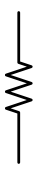

In [42]:
elm.Resistor().down().up()

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:804: UserWarning: Duplicated direction parameter in element. `up` changed to `left`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `left`.")


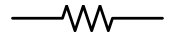

In [43]:
elm.Resistor().up().left()

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:813: UserWarning: Duplicated direction parameter in element. `up` changed to `right`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `right`.")


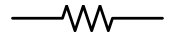

In [44]:
elm.Resistor().up().right()

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:158: UserWarning: Duplicate direciton parameter in element: `up` replaced with `theta=45`
  warnings.warn("Duplicate direciton parameter in element:"


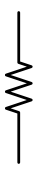

In [45]:
elm.Resistor().up().theta(45)

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:177: UserWarning: Duplicate `at` parameter in element: `Point(1,1)` changed to `(2, 2)`.
  warnings.warn("Duplicate `at` parameter in element: "


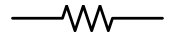

In [46]:
elm.Resistor().at((1,1)).at((2,2))

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:221: UserWarning: Duplicate anchor parameter in element: `center` changed to `center`.
  warnings.warn("Duplicate anchor parameter in element: "


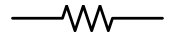

In [47]:
elm.Resistor().anchor('center').anchor('center')